In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

FACE &EYE DETECTION USING HAAR CASCADE

In [2]:
#we are pointing opencv cascadeclassifier function to our classifier(XML file) is stored

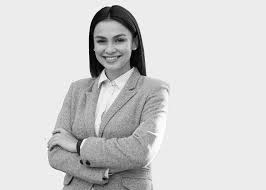

In [3]:
cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
img=cv2.imread('/content/lady.jpeg')
if img is not None:
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray)
  cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  #our classifier returns the ROI of the detected face as a tuple with x,y,w,h
  objects = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
else:
    print("Image not loaded")


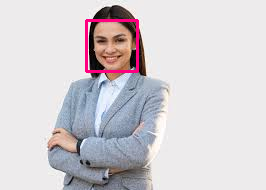

In [4]:
#we iterate through our faces array and draw a rectangle over each face
for (x,y,w,h) in objects:
  cv2.rectangle(img, (x,y),(x+w,y+h),(127,0,255),2)
  cv2_imshow(img)
  cv2.waitKey(0)



face and eye detection

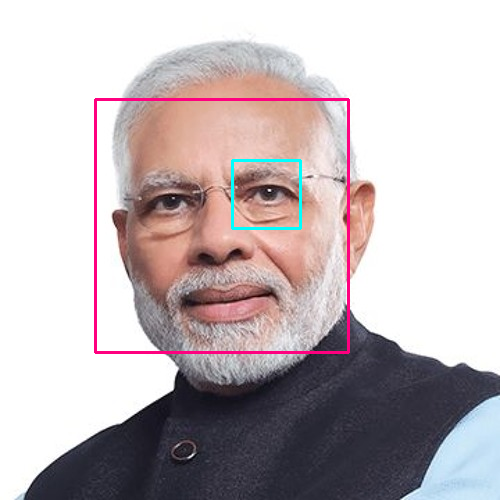

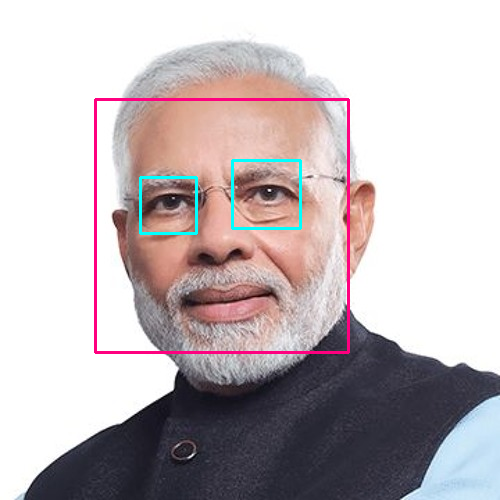

In [5]:
cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
img=cv2.imread('/content/mm.jpeg')
if img is not None:
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #cv2_imshow(gray)
  cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
  #our classifier returns the ROI of the detected face as a tuple with x,y,w,h
  objects = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
else:
    print("Image not loaded")
#we iterate through our faces array and draw a rectangle over each face
for (x,y,w,h) in objects:
  cv2.rectangle(img, (x,y),(x+w,y+h),(127,0,255),2)
  #cv2_imshow(img)
  cv2.waitKey(0)
  roi_gray=gray[y:y+h,x:x+w]
  roi_color=img[y:y+h,x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
    cv2_imshow(img)
    cv2.waitKey(0)




face and eye detection on live video

In [6]:
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def detect(gray, frame):
  #objects = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
  faces=cascade.detectMultiScale(gray,1.3,5)
  for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
      cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
  return frame

In [7]:

video_capture = cv2.VideoCapture(0)

while True:
    _, frame = video_capture.read()

    if frame is not None:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        canvas = detect(gray, frame)
        cv2.imshow("Video", canvas)

        if cv2.waitKey(1) & 0xFF == ord('d'):
            break
    else:
        print("Failed to capture a frame from the camera.")
        break

video_capture.release()
cv2.destroyAllWindows()

Failed to capture a frame from the camera.


In [8]:
# video_capture=cv2.VideoCapture(0)
# while True:
#   _,frame=video_capture.read()
#   if isTrue:
#     gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#     canvas=detect(gray,frame)
#     cv2_imshow(canvas)
#     if cv2.waitKey(1) & 0xFF == ord('d'):
#       break

# video_capture.release()
# cv2.destroyAllWindows()

car detection

In [9]:
import time
import numpy as np

In [10]:
car_classifier=cv2.CascadeClassifier("/content/car_haar.xml")
cap=cv2.VideoCapture('/content/test_video.mp4')

In [11]:
while cap.isOpened():
    # Delay to control the frame rate (you can adjust the delay time)
    time.sleep(0.05)

    # Read a frame from the video capture
    ret, frame = cap.read()

    if ret:
        # Convert the frame to grayscale if needed
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect cars in the frame
        cars = car_classifier.detectMultiScale(gray, scaleFactor=1.4, minNeighbors=2)

        # Process the 'cars' variable (e.g., draw rectangles around the detected cars)
        for (x, y, w, h) in cars:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the processed frame
        cv2_imshow(frame)

        # Check for user input to exit the loop (e.g., pressing 'q')
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        print("Video capture has ended.")
        break

# Release the video capture and close OpenCV windows
cap.release()
cv2.destroyAllWindows()